In [1]:
# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 8,8
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [3]:
import numpy as np
import javabridge
import bioformats
from itkwidgets import view
from sklearn.externals import joblib

In [4]:
# Ignore warnings in notebook
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Create a temporary python PATH to the module that we are using for the analysis
import sys
sys.path.insert(0, "/Users/Espenel/Desktop/Mini-Grant-Image-analysis/2018/Chloe/ChromosomeDetectionChloe/utils")

In [6]:
from chromosome_dsb import *

# Loading a typical image using bioformats

In [7]:
javabridge.start_vm(class_path=bioformats.JARS)

In [59]:
path = '/Users/Espenel/Desktop/Mini-Grant-Image-analysis/2018/Chloe/data_chloe/cku-exo1_002/2017-04-12_RAD51-HTP3_cku80-exo1_002_visit_3_D3D_ALX.dv'

In [60]:
image, meta, directory = load_data.load_bioformats(path)

In [64]:
view(visualization.convert_view(image[:,:,:,3]))

Viewer(gradient_opacity=0.22, rendered_image=<itkImagePython.itkImageUS3; proxy of <Swig Object of type 'itkIm…

# Set Parameters

In [11]:
# Size kernel for background substraction, should be a little larger than the object of interest
back_sub_ch1 = 5
back_sub_ch2 = 5
back_sub_ch3 = 20
# FOCI detection:
# Smallest object (in pixels) to be detected
smaller = 1
# Largest object to be detected
largest = 5
# Threshold above which to look for
thresh = 10000

# Background Substraction

In [12]:
ch1, _ = img_analysis.background_correct(image, ch=1, size=back_sub_ch1)
ch2, _ = img_analysis.background_correct(image, ch=2, size=back_sub_ch2)
ch3, _ = img_analysis.background_correct(image, ch=3, size=back_sub_ch3)

In [13]:
visualization.plot_background(image, ch1, ch2, ch3)

interactive(children=(IntSlider(value=100, description='pos', max=479), Dropdown(description='channel', option…

# Finding FOCI

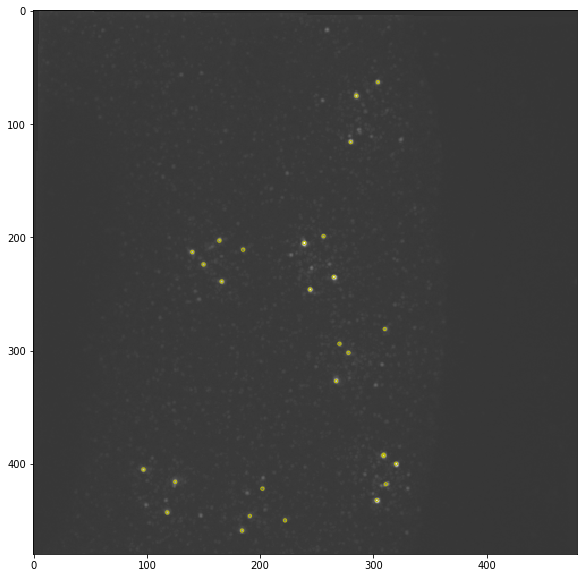

In [14]:
blobs = img_analysis.find_blob(ch1, meta, directory, smaller = smaller, 
                               largest = largest, thresh = 15000,
                               plot=True)